# PCA, IsoMap, t-SNE Dimensionality Reductions

**What is the dimensionality reduction?** Dimensionality reduction methods convert the high-dimensional dataset into two or three-dimensional data that can be displayed, for example, in a scatterplot. In other words, it means that we map each high-dimensional vector into a low-dimensional vector (e.g. 2D).

## Dimensions of a Dataset

Consider a table with 2 columns:

In [1]:
import numpy as np
import pandas as pd

inches = range(100)
feet = [i/12.0 for i in inches]
heights = pd.DataFrame({"inches": inches,
                        "feet":   feet})
heights.head(5)

,inches,feet
0,0,0.000000
1,1,0.083333
2,2,0.166667
3,3,0.250000
4,4,0.333333


Viewing a scatter plot of this dataset reveals that the data points really lie in 1 dimension, not two.

<AxesSubplot:xlabel='inches', ylabel='feet'>

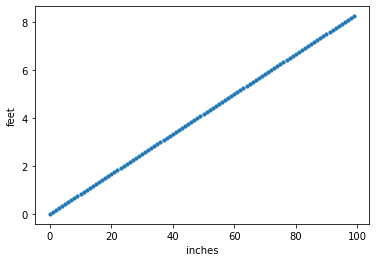

In [5]:
heights.plot.scatter(x='inches', y='feet', s=10)

Intuitively, we can use a one-dimensional line to represent the data rather than the two-dimensional plane of the scatter plot. The intrinsic dimension, or simply the dimension, of the heights table is 1, not 2.

## Matrix Rank

The Dimension of a Data Table is the Rank of the matrix.  The feet column is a linear combination of the inches column. We might view the feet column as contributing no extra information than the inches column. If the heights table lost the feet column, we could reconstruct the feet column exactly using the inches column alone. A linearly dependent column does not “add” another dimension to a data table.

In other words, the dimension of a data table is the number of linearly independent columns in the table, or equivalently the **matrix rank** of the the data.


## Dimensionality Reduction

In most real-world scenarios, though, data seldomly contain columns that are exact linear combinations of other columns because of measurement error. Consider these measurements of overall density vs percent fat for individuals:

<img src="images/pca-dim.png" width="400px" />

The scatter plot shows that density is not a linear combination of percent fat, yet density and percent fat appear “almost” linearly dependent. Intuitively, we can closely approximate density values using a linear combination of the percent fat values.

We use dimensionality reduction techniques to automatically perform these approximations rather than manually examine individual pairs of data variables. Dimensionality reduction techniques are especially useful for exploratory data analysis on high-dimensional data. 

Consider the following wine dataset from [UCI](http://archive.ics.uci.edu/ml/datasets/wine). This dataset contains the results of a chemical analysis of wines grown in the same region in Italy but derived from 3 different cultivars. Our goal will be to reveal the presence of clusters in the wine dataset. In other words, we will check if 3 cultivators are distinguishable in the dataset.

As we can see, the dataset does not contain null values and all features are numeric, which simplifies the data preprocessing.

In [6]:
wine = pd.read_csv("../data/wine.csv")

In [7]:
wine.shape

(178, 14)

So this dataset has 14 dimensions for 178 samples. 

In [8]:
wine.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [9]:
wine["Customer_Segment"].unique()

array([1, 2, 3])

As dependent variable (y), we will select the "Customer_Segment" that specifies the cultivators of wine. The rest of variables will be considered as independent ones (X).

In [10]:
X = wine.drop("Customer_Segment",axis=1)
y = wine["Customer_Segment"]

We want to reveal the presence of clusters in a high-dimensional dataset. In our case we have only 13 independent features, but it will be enough to make a quick demo. To reach this goal, we will use dimensionality reduction methods.

From the outset, we want to know the matrix rank of our wine dataset: which should be 13 (same as the # dimensions):

In [11]:
np.linalg.matrix_rank(X)

13

Dimensionality reduction means that you map each many-dimensional vector into a low-dimensional vector. In other words, you represent (replace) each many-dimensional vector by a low-dimensional vector.

Linear dimensionality reduction means that components of the low-dimensional vector are given by linear functions of the components of the corresponding high-dimensional vector. For example in case of reduction to two dimensions we have:

```
[x1, x2, ..., xn] → [f1(x1, x2, ..., xn), f2(x1, x2, ..., xn)]
```

If f1 and f2 are (non)linear functions, we have a (non)linear dimensionality reduction.

Here is a great explanation from [StackExchange](https://stats.stackexchange.com/questions/124534/how-to-understand-nonlinear-as-in-nonlinear-dimensionality-reduction) illustrating 2 important methods:

<img src="images/dim-reduction.jpeg" width="500px"/>

Here we are looking for 1-dimensional structure in 2D. The points lie along an S-shaped curve. PCA tries to describe the data with a linear 1-dimensional manifold, which is simply a line; of course a line fits these data quite bad. Isomap is looking for a nonlinear (i.e. curved!) 1-dimensional manifold, and should be able to discover the underlying S-shaped curve.


## Principal component analysis (PCA)

Principal component analysis (PCA) is the traditional dimensionality reduction technique that focuses on keeping the low-dimensional representations of dissimilar datapoints far apart. This is the linear method which means that data can only be summarized by a linear combination of features making it impossible to discover, for example, S-shaped curves. Thus, the limitation of linear methods is their inability to discover more complex structures.

PCA is available in sklearn. To get more information about how to tune the parameters of PCA, you can refer to help(PCA).

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
X_pca = PCA(n_components="mle",svd_solver='auto').fit_transform(X)
X_pca.shape

(178, 12)

Among the 12 "principle components", let's see the first 2 most meaningful ones -- and how they can help us cluster similar (or not) types of wine.

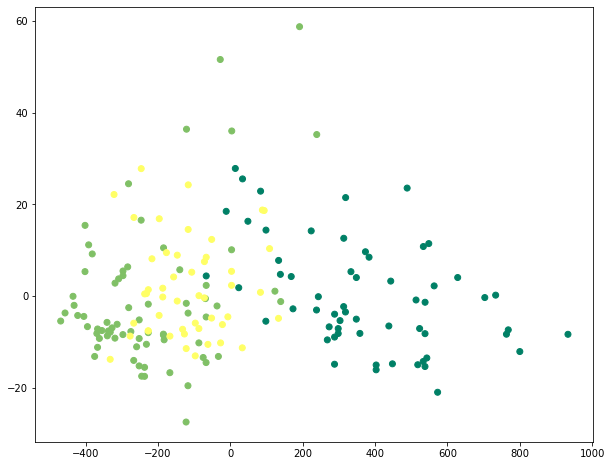

In [14]:
import matplotlib.cm as cm
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='summer')
plt.show()

What we can conclude by looking at this graphic? Basically, we can see that possibly similar points are quite widely spread. In general, the wine dataset represents the "well behaved" class structure, however if we would deal with a more complex case, we would see that the linear mapping does not allow keeping the low-dimensional representations of very similar datapoints close together.

## Dimensionality Reduction with Isometric Mapping

We use dimensionality reduction techniques to summarize data tables with many dimensions. 

Isometric Mapping is a non-linear dimensionality reduction method. Nonlinear dimensionality reduction means that components of the low-dimensional vector are given by non-linear functions of the components of the corresponding high-dimensional vector. Refer to help(Isomap)in order to find more information about the parameters of Isomap.

In [16]:
from sklearn.manifold import Isomap
help(Isomap)

Help on class Isomap in module sklearn.manifold._isomap:

class Isomap(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Isomap(*, n_neighbors=5, n_components=2, eigen_solver='auto', tol=0, max_iter=None, path_method='auto', neighbors_algorithm='auto', n_jobs=None, metric='minkowski', p=2, metric_params=None)
 |  
 |  Isomap Embedding.
 |  
 |  Non-linear dimensionality reduction through Isometric Mapping
 |  
 |  Read more in the :ref:`User Guide <isomap>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to consider for each point.
 |  
 |  n_components : int, default=2
 |      Number of coordinates for the manifold.
 |  
 |  eigen_solver : {'auto', 'arpack', 'dense'}, default='auto'
 |      'auto' : Attempt to choose the most efficient solver
 |      for the given problem.
 |  
 |      'arpack' : Use Arnoldi decomposition to find the eigenvalues
 |      and eigenvectors.
 |  
 |      'dense' : Use a direct solver (i.e. LAPA

One of the disadvantages is that the functionality of this algorithm depends almost on the choice of the number of neighbors. This means that just a few outliers can break the mapping. The sensitivity of the algorithm to the number of neighbors can be seen below. Let's set n_neighbors to be equal to 5 and 40.

/Users/pmui/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/pmui/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


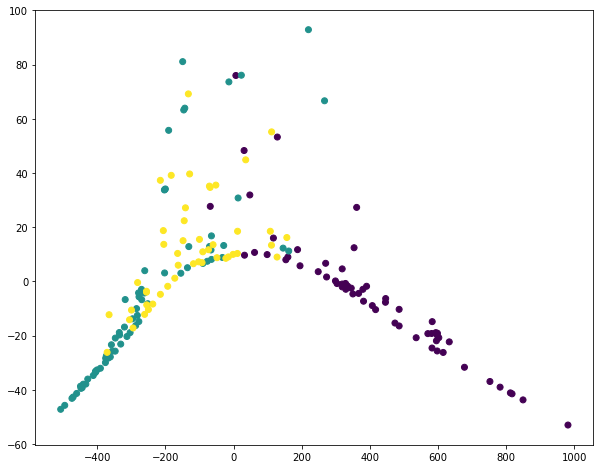

In [17]:
embedding = Isomap(n_components=2,n_neighbors=5)
X_isomap = embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)

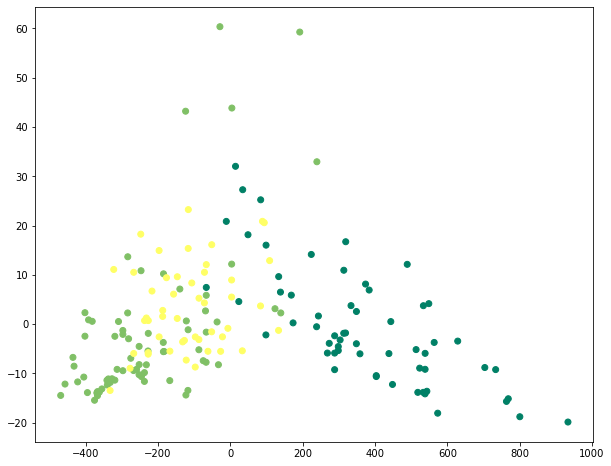

In [19]:
embedding = Isomap(n_components=2,n_neighbors=40)
X_isomap = embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='summer')

Besides the sensitivity to the number of neighbors, Isometric Mapping produces solutions in which there are large overlaps between the classes.

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-Distributed Stochastic Neighbor Embedding (t-SNE) is capable of capturing much of the local structure of the high-dimensional data very well, while also revealing global structure such as the presence of clusters at several scales. t-SNE attempts to preserve local structure: points that are close (according to some metric) in high-dimensional space remain close in the new, low-dimensional space.

To find more details about t-SNE, please refer to this [article](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).

In [20]:
from sklearn.manifold import TSNE
help(TSNE)

Help on class TSNE in module sklearn.manifold._t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, *, perplexity=30.0, early_exaggeration=12.0, learning_rate='warn', n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='warn', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None, square_distances='legacy')
 |  
 |  T-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  

/Users/pmui/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


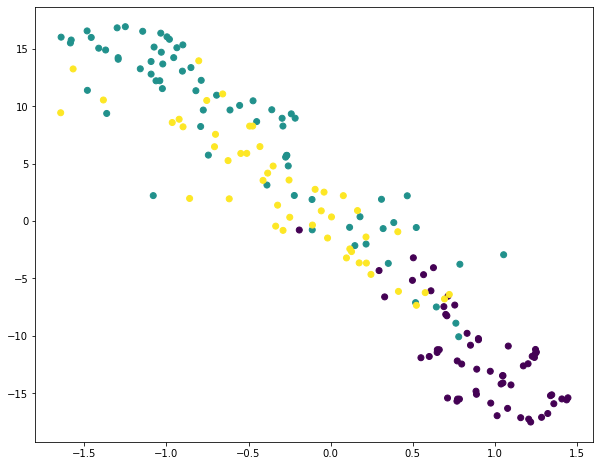

In [32]:
# Random state
RS = 1
X_tsne = TSNE(random_state=RS,learning_rate=8,metric="euclidean").fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

## Comparison of Dimensionality Reduction Methods

Comparing 3 dimensionality reduction methods for clustering:

<Figure size 432x288 with 0 Axes>

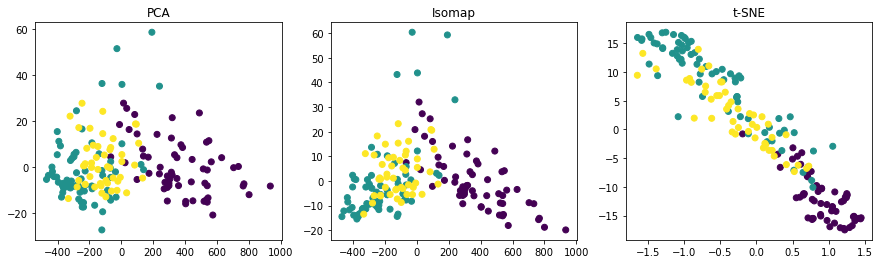

In [33]:
fig = plt.figure(figsize=(6, 4))
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
_ = ax1.set_title('PCA')
ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
_ = ax2.set_title('Isomap')
ax3.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
_ = ax3.set_title('t-SNE')

As seen above, t-SNE constructs a map in which the separation between 3 classes is quite good. We can very clearly observe the existance of 3 different clusters in our dataset, which basically means that it should be relatively easy to build an accurate classification model for this dataset.

Thus, we were able to quickly reveal the presence of clusters in the dataset before even dedicating efforts in building the classification model.